## Nó

In [1]:
class NodoArvore:
  
  def __init__(self, chave=None, esquerda=None, direita=None):
  
    self.chave = chave
        
    self.esquerda = esquerda
        
    self.direita = direita

  def __repr__(self):
  
    return '%s <- %s -> %s' % (self.esquerda and self.esquerda.chave,
                               self.chave,
                               self.direita and self.direita.chave)

## Inserir

In [2]:
def insere(raiz, nodo):

  """Insere um nodo em uma árvore binária de pesquisa."""

  # nodo deve ser inserido na raiz.

  if raiz is None:

    raiz = nodo

  # nodo deve ser inserido na subárvore direita.

  elif raiz.chave < nodo.chave:
  
    if raiz.direita is None:
      
      raiz.direita = nodo
    
    else:
    
      insere(raiz.direita, nodo)

  # nodo deve ser inserido na subárvore esquerda.

  else:
      
    if raiz.esquerda is None:
      
      raiz.esquerda = nodo
      
    else:
      
      insere(raiz.esquerda, nodo)

## 1. Implemente um código que encontre o menor elemento em uma ABP.

O menor elemento de uma ABP é o nodo mais à esquerda na árvore.

In [3]:
def menor(nodo):

  if not nodo:

    return None

  elif not nodo.esquerda:

    return nodo.chave

  else:
  
    return menor(nodo.esquerda)

### Árvore Vazia

In [4]:
raiz = None

print(menor(raiz))

None


### Um Elemento

In [5]:
raiz = NodoArvore(40)

print(menor(raiz))

40


### Mais de um Elemento

In [6]:
for chave in [20, 60, 50, 70, 10, 30]:

  nodo = NodoArvore(chave)

  insere(raiz, nodo)

print(menor(raiz))

10


## 2. Implemente um código que encontre o maior elemento em uma ABP.

O maior elemento de uma ABP é o nodo mais à direita na árvore.

In [7]:
def maior(raiz):

  if not raiz:

    return None

  else:

    nodo = raiz

    while nodo.direita:
    
        nodo = nodo.direita
    
    return nodo.chave

### Árvore Vazia

In [8]:
raiz = None

print(maior(raiz))

None


### Um Elemento

In [9]:
raiz = NodoArvore(40)

print(maior(raiz))

40


### Mais de um Elemento

In [10]:
for chave in [20, 60, 50, 70, 10, 30]:

  nodo = NodoArvore(chave)

  insere(raiz, nodo)

print(maior(raiz))

70


## 3. Implemente um código que verifica se duas árvores binárias são idênticas.

As três situações a serem tratadas são resumidas no código abaixo.

In [11]:
def identicas(a, b):

  # 1. As duas árvores são vazias.
  
  if a is None and b is None:
  
    return True

  # 2. Nenhuma das árvores é vazia.
  
  elif a is not None and b is not None:
  
    return ((a.chave == b.chave) and identicas(a.esquerda, b.esquerda) and identicas(a.direita, b.direita))

  # 3. Uma árvore é vazia mas a outra não.

  else:

    return False

### As duas árvores são vazias.

In [12]:
a, b = None, None

print(identicas(a,b))

True


### Nenhuma das árvores é vazia

In [13]:
# Árvore a

a = NodoArvore(40)

for chave in [20, 60, 50, 70, 10, 30]:

  nodo = NodoArvore(chave)

  insere(a, nodo)

# Árvore b

b = NodoArvore(40)

for chave in [30, 60, 50, 70, 10, 20]:

  nodo = NodoArvore(chave)

  insere(b, nodo)

# São identicas?

print(identicas(a,b))

False


### Uma árvore é vazia mas a outra não.

In [14]:
b = None

print(identicas(a,b))

False


## 4. Implemente um código que calcula a altura de uma ABP.

A altura de um nodo em uma árvore é o número de níveis desde o nodo em questão até a folha mais baixa da árvore. 
- Quando falamos da altura de uma árvore, estamos nos refedindo à altura do nodo raíz. 


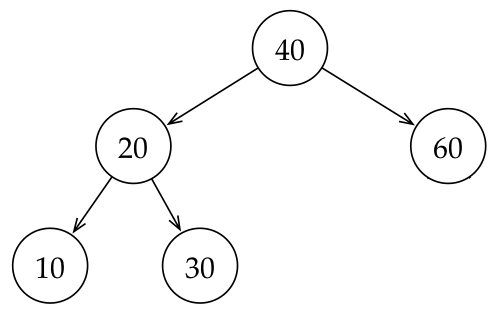

Para determinarmos a altura, precisamos calcular o tamanho dos caminhos entre a raiz e todas as folhas. Vamos lá:

40 -> 20 -> 10. Tamanho do caminho = 3.

40 -> 20 -> 30. Tamanho do caminho = 3.

40 -> 60. Tamanho do caminho = 2.

Como dito anteriormente, a altura da árvore é o maior caminho, ou seja, h=3.

In [15]:
def h(nodo):
  
  if nodo:
    
    if nodo.esquerda:

      hesq = h(nodo.esquerda)
    
    else:
    
      hesq = 0

    if nodo.direita:
    
      hdir = h(nodo.direita)
    
    else:
    
      hdir = 0
    
    if hdir > hesq:
    
      return hdir + 1

    else:

      return hesq + 1

  else:

    return 0

In [16]:
def h(nodo):

  if nodo:
  
    return max(h(nodo.esquerda), h(nodo.direita)) + 1
    
  else:

    return 0

In [23]:
h(None)

0

### Árvore vazia

In [17]:
raiz = None

print(h(raiz))

0


### Um Elemento

In [18]:
raiz = NodoArvore(40)

print(h(raiz))

1


### Mais de um Elemento

In [19]:
for chave in [20, 60, 50, 70, 10, 30]:

  nodo = NodoArvore(chave)

  insere(raiz, nodo)

print(h(raiz))

3





## 5. Implemente um código que verifica se uma árvore binária é balanceada.

Uma árvore é balanceada se para qualquer nó a altura de suas subarvores diferem em no máximo uma unidade. Ou seja, uma árvore balanceada é aquela que a altura é O(logn). Usamos o conceito de balaceamento para garantir que ela não tenha o comportamento de uma lista ligada, ou seja, para que a inserçao, remoção e busca em O(n). Na figura abaixo, a árvore a) é balanceada, e a árvore b) não é balanceada.

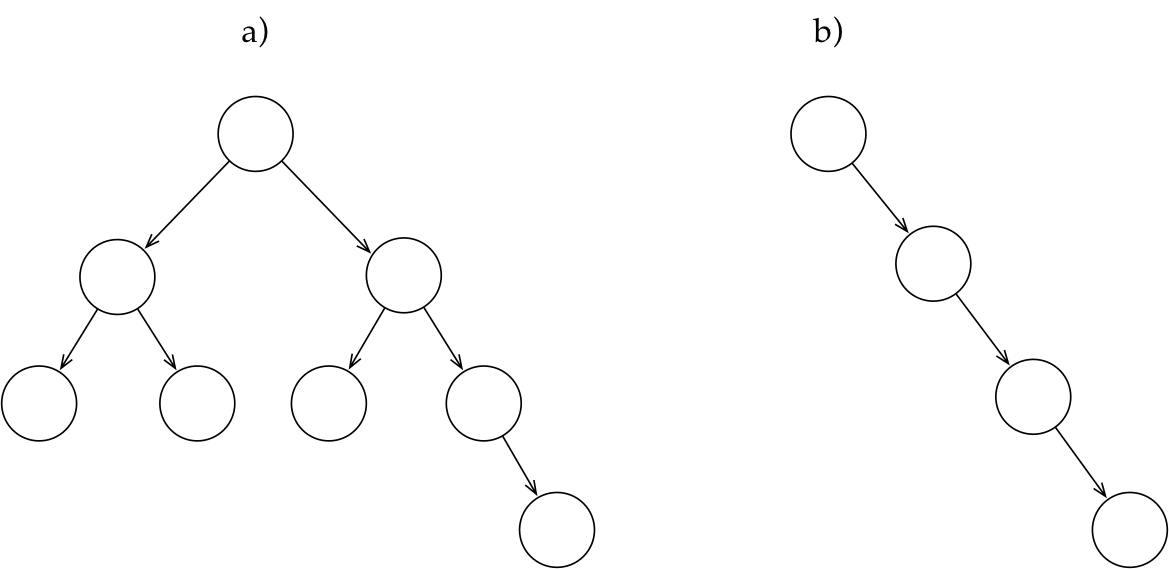

In [20]:
def balanceada(node):

  if node is None:
  
    return True

  elif abs(h(node.esquerda) - h(node.direita)) > 1:
  
    return False

  else:

    return balanceada(node.esquerda) and balanceada(node.direita)

In [21]:
raiz = NodoArvore(40)

for chave in [20, 60, 50, 70, 10, 30]:

  nodo = NodoArvore(chave)

  insere(raiz, nodo)

print(balanceada(raiz))

True


In [22]:
raiz = NodoArvore(10)

for chave in [20, 30, 40, 50, 60, 70]:

  nodo = NodoArvore(chave)

  insere(raiz, nodo)

print(balanceada(raiz))

False


## 6. Determine se uma árvore é simétrica (DESAFIO)

Uma árvore é simétrica se a subárvore esquerda for um espelho da subárvore direita. 

A figura abaixo mostra uma árvore simétrica, na parte a), e uma árvore não simétrica, na parte b).

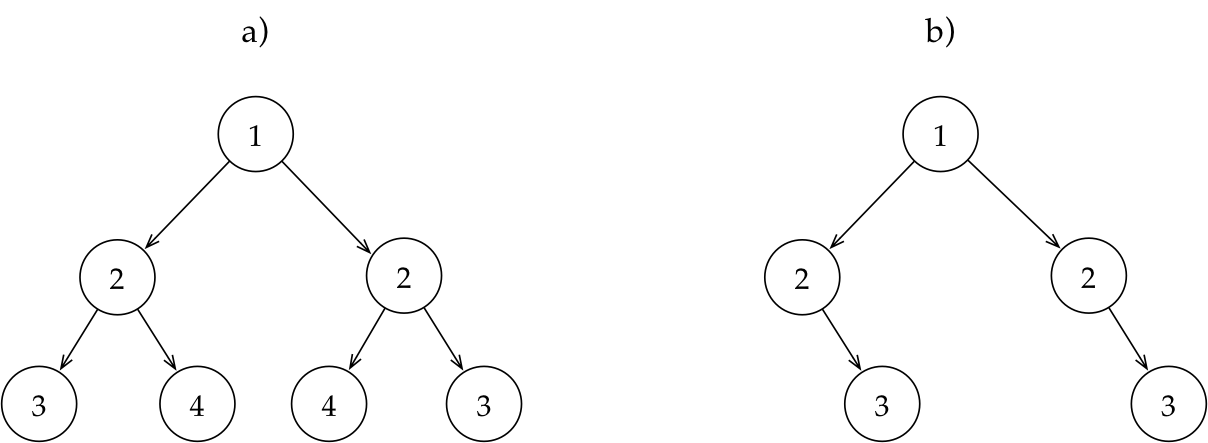